# Written by Federica B. Bianco @fedhere
# NYU CUSP PUI2016
# Assignment 1 Homework 3
# This is a skeleton & instruction notebook
- ## GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                 
- ## For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 

- ## Describe the behavior you see in the plots in terms of the law of large numbers.

- ## PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing

## Extra Credit: FIT a gaussian to the distribution of means            

# __***YOU SHOULD HAVE NOTICED THAT THE ARRAY OF SIZES, AND THUS THE ARRAY OF DISTRIBUTION IN MY EXAMPLE WAS NOT SIZE 100!! I PURPOSEFULLY PRINTED THE SIZE OUT AND IT WAS 99!*** __

# ***This is a warning for all future homework assignments: *** 
# I SEED MY NOTEBOOK WITH LITTLE ERRORS, NOT BECAUSE I AM EVIL, BUT  TO ASSURE THAT YOU PAY ATTENTION AND DONT JUST COPY AND PASTE. 

# THIS VERSION HAS THE SIDE GENERATED CORRECTLY

In [20]:
from __future__ import print_function, division
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
import numpy as np
import scipy
from scipy.optimize import curve_fit
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use and set the seed

In [2]:
MYMEAN = 30 # This will be the mean for all distributions 
# It can be whatever I choose
EULERGAMMA = 0.5772156649 # for Gumbel distrib
np.random.seed(123)
#the distributions I choose
distributions = ['chisq', 'normal', 'poisson', 'binomial', 'gumbel']

In [4]:
md = {}
for k in distributions: 
    md[k] = {} 
# md is an empty disctionary that will host all my distributions

In [5]:
# the array of sizes
mysizes = (np.linspace(10, np.sqrt(2000), 100)**2).astype(int)

# checks that the sizes agree with the homework requirements
print("Number of unique elements of mysize", len(set(mysizes)))
if not len(set(mysizes)) == 100:
    print ("WARNING: you must have 100 unique elements in size array! "+\
           "If you plan on using the size as dictionary key, "+\
           "those have to be unique.")
if min(mysizes) < 10 or max(mysizes) > 2000:
    print ("ERROR: all 100 sizes should be between 10 and 2000")

Number of unique elements of mysize 100


### creating the functions 


In [6]:
def create_distributions(distName, distFunc, distPars, 
                         distSizes, plotTitle):
    '''Creates 100 samples of different sizes into a dictionary
    Arguments: 
        distName: name of the distribution, string
        distFunc: the function that creates the distribution
        distPars: parameters of the distribution, tuple
        distSizes: sizes of the distributions, array
        plotTitle: title of the plot, string
    Return:
        a dictionary containing:
            the distibutions as size-distribution key-value pairs
            the mean of each distribution, 
                key:'means', value: array of means
    '''
    distrib = {}
    for n in distSizes:
        if distName == 'normal':
            distrib[n] = distPars[1]* distFunc(n) + distPars[0]
        else:     
            distrib[n] = distFunc(*distPars, size=n)
        
    distrib['means'] = {}
    ax = pl.figure(figsize=(10,6)).add_subplot(111)

    for nn in distrib:
        if not type(nn) == str:
            distrib['means'][nn] = distrib[nn].mean()
            #and plot it
            ax.plot(nn, distrib['means'][nn], 'o')
            ax.set_xlabel('sample size', fontsize=18)
            ax.set_ylabel('sample mean', fontsize=18)
            ax.set_title(plotTitle, fontsize=18)
            ax.plot([min(distSizes), max(distSizes)], [MYMEAN, MYMEAN], 'k')
    return distrib
# POINTS: points must be removed for: 
# incorrect use of  distribution function, 
# failure to use the same mean, 
# incorrect number of distributions. Other mistaked may be accounted for. 

In [7]:
def plotOneDistHistogram(distDic, histTitle):
    '''Function to plot a histogram of a distribution
    Argumens:
        distDic: dictionary containing N a distribution 
        histTitle: title of the histogram plot
    '''
    allmeans = list(distDic['means'].values())

    pl.figure(figsize=(10, 10))
    pl.hist(allmeans, bins=30, normed=True)
    pl.plot([MYMEAN, MYMEAN], pl.ylim(), 'k-')
    pl.xlabel('sample mean', fontsize = 18)
    pl.ylabel('Frequency of sample mean', fontsize = 18)
    pl.title(histTitle, fontsize=20)


In [8]:
# I need a gaussian for the extra credit part:
# fit a gaussian to the distribution of all the means
def mygauss(x, gmu, gsig):
    '''Gaussian distributions
    Arguments:
        x: independent variable
        gmu: mean
        gsig: standard deviation
    Returns:
        value of the Gaussian distribution for all values of x, array
    '''
    return np.exp(-0.5 * (x - gmu)**2 / gsig)


# Chi-square distribution
### depends on the parameter df: degrees of freedom
### dof = mean
### variance = 2dof

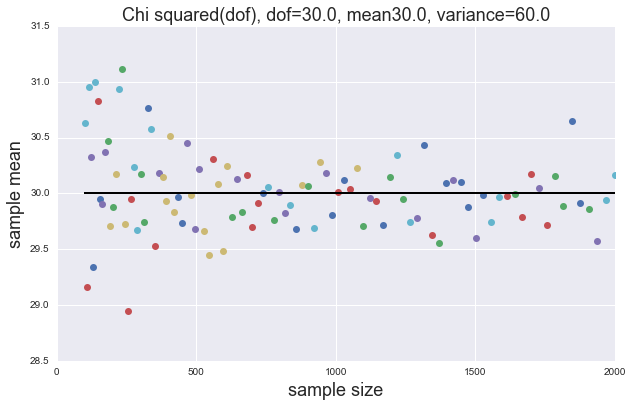

In [9]:
df = MYMEAN
md['chisq'] = create_distributions('chisq', np.random.chisquare, (df,), 
                                   mysizes, 
                     'Chi squared(dof), dof=%.1f, mean%.1f, variance=%.1f'\
                     %(df, df, 2*df))

### Figure 1: The distribution of means of the sample is plotted against the size of the sample. The distribution of means narrows toward the true mean of the population, which is marked by a black horizontal line, as N increases.
### (Notice: for optimal visibility of this effect I chose the size so that more small distributions are generated, and the plot has equal density at all points in the x axis.)

#### POINTS: points are to be removed for wrong distribution, failure to identify and describe the elements of the plot, flawd interpretation of the plot

# histogram of the mean of all samples: 



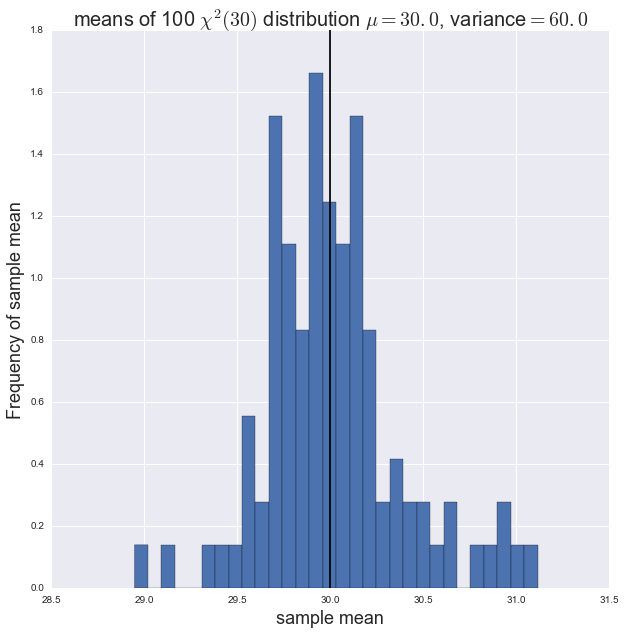

In [10]:
plotOneDistHistogram(md['chisq'], r"means of 100 $\chi^2(%d)$ "%df + \
            "distribution $\mu=%.1f$, variance$=%.1f$"%(df, df * 2))

### Figure 2: Chi-square(degrees of freedom). The mean of all 100 samples is bell shaped, according to the expectation that it would be Gaussian distributed, and peaks near 100, according to the expectation that the mean of the distribution of means is equal to the mean of the population, indicated by a vertical black line (the mean of model from which we generate all distributions in this case)

# Normal distribution
### depends on the parameters mean and variance
### I will choose a variance of 100, or equvalently a standard deviation = 10


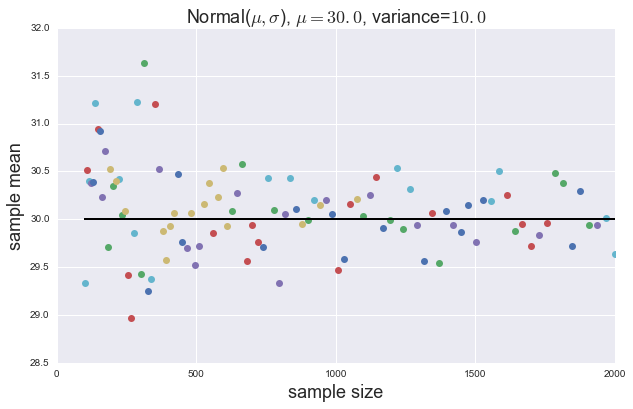

In [11]:
stdev = 10
md['normal'] = create_distributions('normal', np.random.randn, 
                                    (MYMEAN, stdev), mysizes, 
                r'Normal($\mu, \sigma$), $\mu=%.1f$, variance=$%.1f$'\
                     %(MYMEAN, stdev))

### Figure 3: The distribution of means of the sample narrows toward the true mean of the population as N increases.

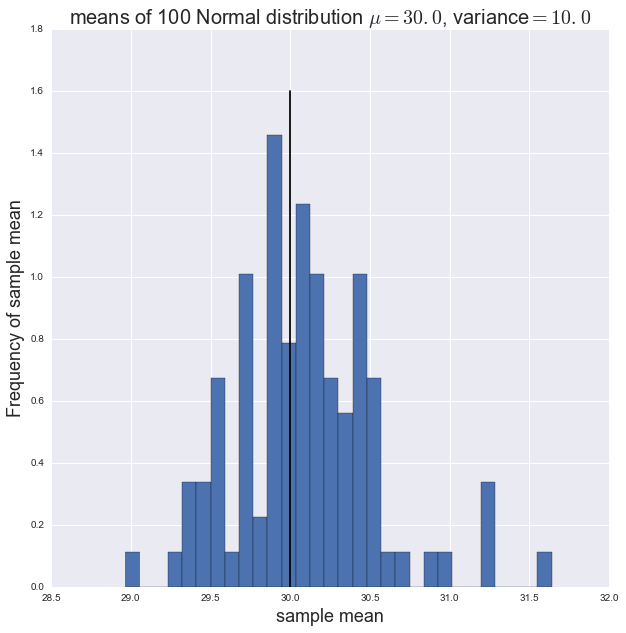

In [12]:
plotOneDistHistogram(md['normal'], 
            r"means of 100 Normal distribution $\mu=%.1f$, "%MYMEAN + 
                     "variance$=%.1f$"%stdev)


### Figure 4: Normal (mu, sigma). The mean of all 100 samples is bell shaped, according to the expectation that it would be Gaussian distributed, and peaks near 100, according to the expectation that the mean of the distribution of means is equal to the mean of the population. 

### The distribution of means has the same spread as the distribution of chisq means, despite the smaller standard deviation of the normal distribution mean I choose.

# Poisson distribution
### depends on the parameter lambda
### lambda = mean
### variance = lambda

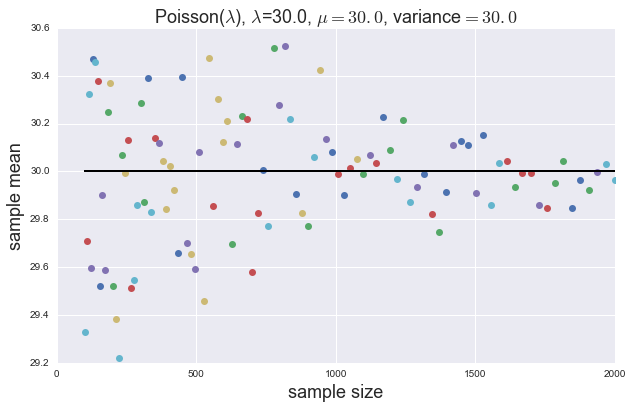

In [13]:
lam = MYMEAN
md['poisson'] = create_distributions('poisson', np.random.poisson, (lam,), 
                                   mysizes, 
    r'Poisson($\lambda$), $\lambda$=%.1f, $\mu=%.1f$, variance$=%.1f$'%\
                                     (lam, lam, lam))

### Figure 5:  The distribution of means of the sample narrows toward the true mean of the population as N increases.

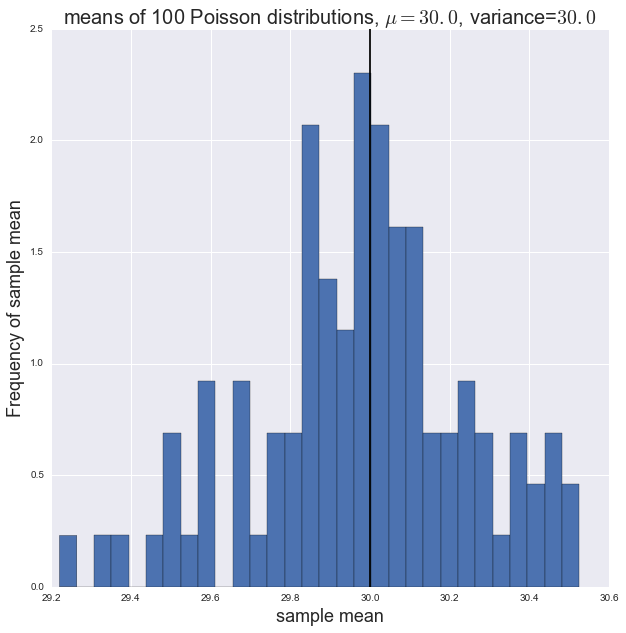

In [14]:
plotOneDistHistogram(md['poisson'], 
                     r"means of 100 Poisson distributions, " +\
                     "$\mu=%.1f$, variance=$%.1f$"%(lam, lam))


### Figure 6: Poisson(lambda). The mean of all 100 samples is bell shaped, according to the expectation that it would be Gaussian distributed, and peaks near 100, according to the expectation that the mean of the distribution of means is equal to the mean of the population. 


# Binomial distribution
### numpy.random.binomial takes arguments p and n
### the mean of a binomial is n\*p
### the variance is n\*p\*(1-p)


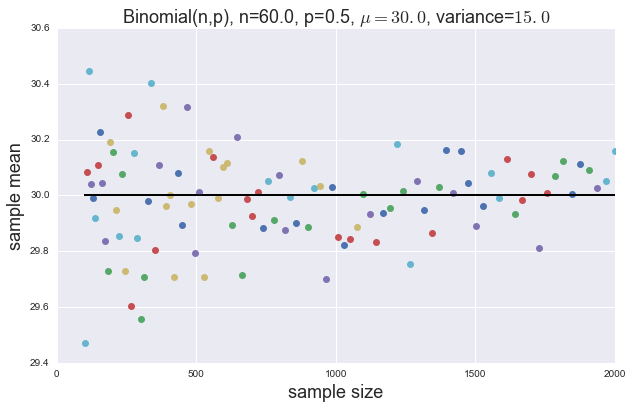

In [15]:
binom_p = 0.5
binom_n = MYMEAN / binom_p

md['binomial'] = create_distributions('binomial', np.random.binomial, 
                                      (binom_n, binom_p), 
                                       mysizes, 
                                      r'Binomial(n,p), '+\
                                      r'n=%.1f, '%binom_n + \
                                      r'p=%.1f, '%binom_p + \
                                      r'$\mu=%.1f$, '%(binom_n * 
                                                      binom_p) +\
                                      r'variance=$%.1f$'%(binom_n * 
                                                        binom_p * 
                                                        (1 - binom_p)))

### Figure 7: The distribution of means of the sample narrows toward the true mean of the population as N increases.

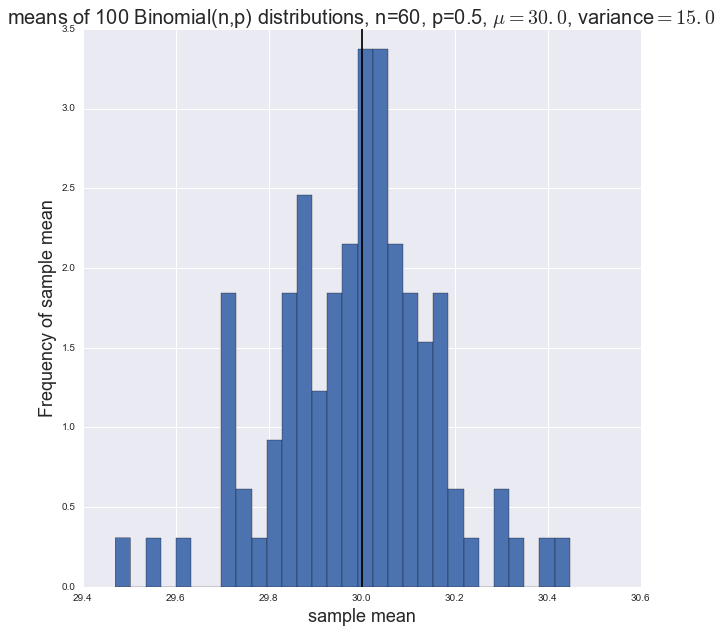

In [16]:
plotOneDistHistogram(md['binomial'], 
                     r"means of 100 Binomial(n,p) distributions, " +\
                     "n=%1.f, p=%.1f, "%(binom_n, binom_p) +\
                     "$\mu=%.1f$, "%(binom_n * binom_p) +\
                     "variance$=%.1f$"%(binom_n * binom_p*(1 - binom_p)))


### Figure 8: Poisson(lambda). The mean of all 100 samples is bell shaped, according to the expectation that it would be Gaussian distributed, and peaks near 100, according to the expectation that the mean of the distribution of means is equal to the mean of the population. 


# Gumbel distribution
### depends on the parameters location (mode) and scale 
### mean =  location + scale \* $\gamma $
### where $\gamma$ is Euler's constant

### variance = $\frac{(\pi*\mathrm{scale})^2}{6}$

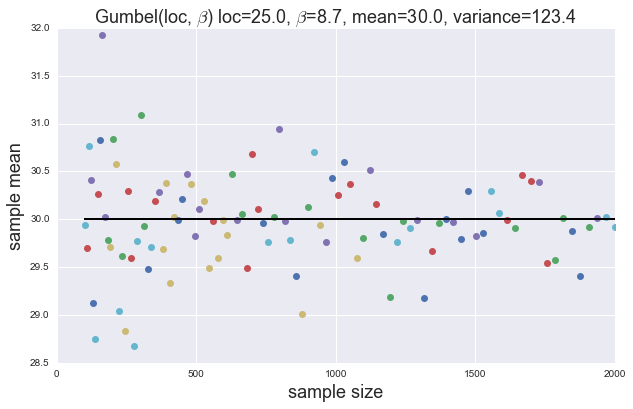

In [17]:
loc = 25.
scale = (MYMEAN * 1.0 - loc) / EULERGAMMA

md['gumbel'] = create_distributions('gumbel', np.random.gumbel, 
                                      (loc, scale), 
                                       mysizes, 
                        r'Gumbel(loc, $\beta$) '+ \
                        r'loc=%.1f, '%loc + \
                        r'$\beta$=%.1f, '%scale + \
                        r'mean=%.1f, '%(loc + scale * EULERGAMMA) +\
                        r'variance=%.1f'%(1./6. * np.pi**2 * scale**2))

### Figure 9: The distribution of means of the sample narrows toward the true mean of the population as N increases.

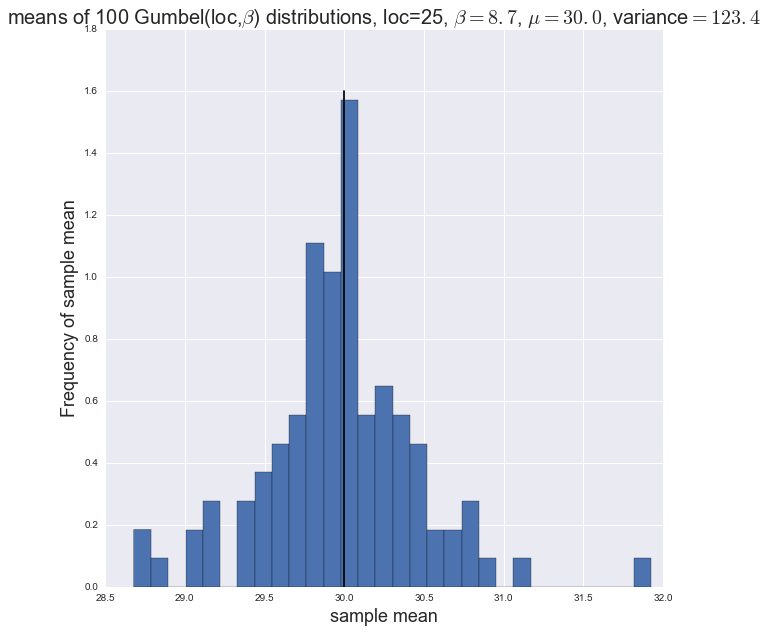

In [18]:
plotOneDistHistogram(md['gumbel'], 
                     r"means of 100 Gumbel(loc,$\beta$) distributions, " +\
                     r"loc=%1.f, $\beta=%.1f$, "%(loc, scale) +\
                     r"$\mu=%.1f$, "%(loc + scale * EULERGAMMA) +\
                     r"variance$=%.1f$"%(1./6. * np.pi**2 * scale**2))


### Figure 10: Gumbel(location, scale). The mean of all 100 samples is bell shaped, according to the expectation that it would be Gaussian distributed, and peaks near 100, according to the expectation that the mean of the distribution of means is equal to the mean of the population. 


Gaussian fit parameters (fixed sigma): mean={0:.1f}, stdev=4.5e-02, 1.0/(N**0.5)=4.5e-02
Chi square of gaussian fit: $\chi^2$/DOF=0.8


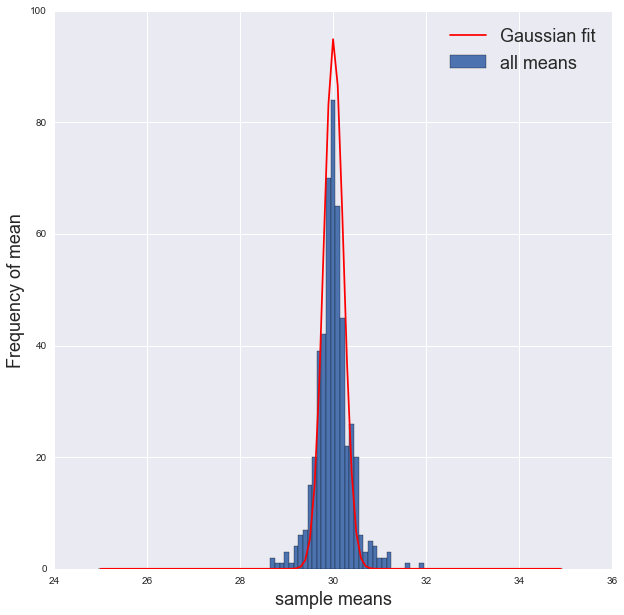

In [25]:
distall = []
for d in distributions:
    distall = distall + list(md[d]['means'].values())
fig = pl.figure(figsize=(10, 10))
h, b, apatch = pl.hist(distall, bins=np.arange(25 - 0.05, 35 + 0.05, 0.1),
                      label = "all means")
herr = np.sqrt(h)

# Fit a normal distribution to the data:
mu, sig = scipy.stats.norm.fit(distall, fscale = 1.0 / np.sqrt(500.))
print(r"Gaussian fit parameters (fixed sigma): mean={0:.1f}, " + 
      "stdev={1:.1e}, 1.0/(N**0.5)={2:.1e}".\
      format(mu, sig, 1.0 / np.sqrt(500.)))
print(r"Chi square of gaussian fit: $\chi^2$/DOF={:.1f}".\
      format(sum((80 * mygauss(np.arange(25, 35, 0.1)[h > 0], mu, sig) - \
                  h[h > 0])**2 / (herr[h > 0]**2) ) / (len(h)-1)))
pl.plot(np.arange(25, 35, 0.1), 95 * mygauss(np.arange(25, 35, 0.1), 
                                            mu, sig), 'r-', 
        label="Gaussian fit")
pl.xlabel("sample means", fontsize=18)
pl.ylabel("Frequency of mean", fontsize=18)
pl.legend(fontsize=18)

### Figure 11: The distribution of all means looks like a gaussian and is well fit by a gaussian function (red line) with parameters $\mu$=30.0 and $\sigma$=$1/\sqrt(N)$, wich a reduced $\chi^2$ for the fit $\chi^2=0.8$. 
### The means of the samples of each distributions are normally distributed, hence it is not surprising that the total distribution should be well fit by a Gaussian 